In [1]:
#import modules
%matplotlib inline
import xarray
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
from matplotlib.axes import Axes
from cartopy.mpl.geoaxes import GeoAxes
import cartopy.feature as cfeature
GeoAxes._pcolormesh_patched = Axes.pcolormesh

In [2]:
#get the url from the website
datapath = 'https://data.nodc.noaa.gov/thredds/dodsC/ncei/woa/salinity/decav/0.25/woa18_decav_s00_04.nc'

In [4]:
data = xarray.open_dataset(datapath, decode_times=False)#read the data
data.variables#check variables

<xarray.Dataset>
Dimensions:             (depth: 102, lat: 720, lon: 1440, nbounds: 2, time: 1)
Coordinates:
  * lat                 (lat) float32 -89.875 -89.625 -89.375 ... 89.625 89.875
  * lon                 (lon) float32 -179.875 -179.625 ... 179.625 179.875
  * depth               (depth) float32 0.0 5.0 10.0 ... 5300.0 5400.0 5500.0
  * time                (time) float32 4326.0
Dimensions without coordinates: nbounds
Data variables:
    crs                 int32 ...
    lat_bnds            (lat, nbounds) float32 ...
    lon_bnds            (lon, nbounds) float32 ...
    depth_bnds          (depth, nbounds) float32 ...
    climatology_bounds  (time, nbounds) float32 ...
    s_an                (time, depth, lat, lon) float32 ...
    s_mn                (time, depth, lat, lon) float32 ...
    s_dd                (time, depth, lat, lon) float64 ...
    s_sd                (time, depth, lat, lon) float32 ...
    s_se                (time, depth, lat, lon) float32 ...
    s_oa                (time, depth, lat, lon) float32 ...
    s_gp                (time, depth, lat, lon) float64 ...
Attributes:
    Conventions:                     CF-1.6, ACDD-1.3
    title:                           World Ocean Atlas 2018 : sea_water_salin...
    summary:                         Climatological mean salinity for the glo...
    references:                      Zweng, M. M, J. R. Reagan, D. Seidov, T....
    institution:                     National Centers for Environmental Infor...
    comment:                         global climatology as part of the World ...
    id:                              woa18_decav_s00_04.nc
    naming_authority:                gov.noaa.ncei
    sea_name:                        World-Wide Distribution
    time_coverage_start:             1955-01-01
    time_coverage_end:               2017-12-31
    time_coverage_duration:          P63Y
    time_coverage_resolution:        P01Y
    geospatial_lat_min:              -90.0
    geospatial_lat_max:              90.0
    geospatial_lon_min:              -180.0
    geospatial_lon_max:              180.0
    geospatial_vertical_min:         0.0
    geospatial_vertical_max:         5500.0
    geospatial_lat_units:            degrees_north
    geospatial_lat_resolution:       0.25 degrees
    geospatial_lon_units:            degrees_east
    geospatial_lon_resolution:       0.25 degrees
    geospatial_vertical_units:       m
    geospatial_vertical_resolution:  SPECIAL
    geospatial_vertical_positive:    down
    creator_name:                    Ocean Climate Laboratory
    creator_email:                   NCEI.info@noaa.gov
    creator_url:                     http://www.ncei.noaa.gov
    creator_type:                    group
    creator_institution:             National Centers for Environmental Infor...
    project:                         World Ocean Atlas Project
    processing_level:                processed
    keywords:                        Oceans< Ocean Salinity >
    keywords_vocabulary:             ISO 19115
    standard_name_vocabulary:        CF Standard Name Table v49
    contributor_name:                Ocean Climate Laboratory
    contributor_role:                Calculation of climatologies
    cdm_data_type:                   Grid
    publisher_name:                  National Centers for Environmental Infor...
    publisher_institution:           National Centers for Environmental Infor...
    publisher_type:                  institution
    publisher_url:                   http://www.ncei.noaa.gov/
    publisher_email:                 NCEI.info@noaa.gov
    nodc_template_version:           NODC_NetCDF_Grid_Template_v2.0
    license:                         These data are openly available to the p...
    metadata_link:                   https://www.nodc.noaa.gov/OC5/woa18/
    date_created:                    2019-07-30 
    date_modified:                   2019-07-30

In [16]:
salinity = data.s_an.sel(depth = 0)#slicing the data to sea surface salinity

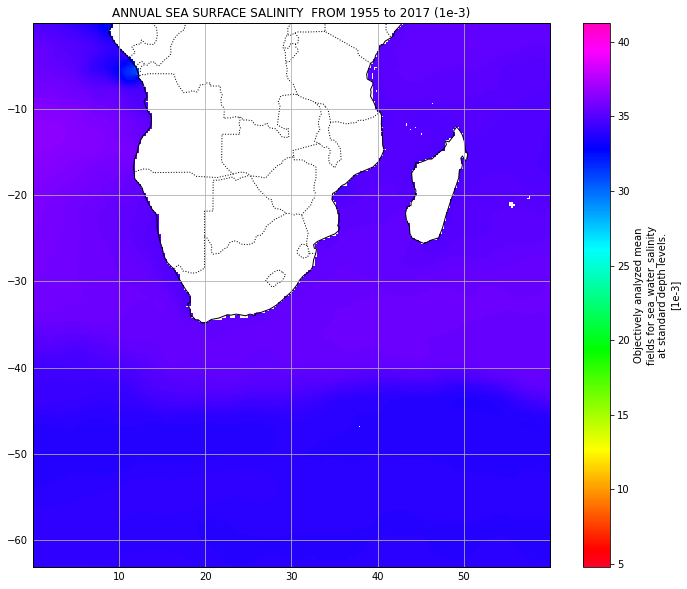

In [23]:
#PLOTTING
fig = plt.figure(figsize=(12, 10))
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=0.0, globe=None))
salinity.plot(ax=ax, transform=ccrs.PlateCarree(), cmap='gist_rainbow')

#customising the plot
ax.coastlines()
ax.set_extent([0,60,0,-60])
gl = ax.gridlines(draw_labels=True)
gl.xlabels_top = False
gl.ylabels_left = True
gl.ylabels_right = False

plt.title('ANNUAL SEA SURFACE SALINITY  FROM 1955 to 2017 (1e-3)')
ax.add_feature(cfeature.BORDERS, linestyle=':')